In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Abinay Rachakonda\Downloads\archive (1)\marketing_campaign.csv",sep="\t")

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [7]:
df.shape

(2240, 29)

# Data cleaning

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(2216, 29)

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

# Non- visual analysis

In [30]:
discrete_df = df.select_dtypes(include=['object'])

In [31]:
def discrete_univariate_analysis(discrete_data):
  for col_name in discrete_data:
    print("*"*10, col_name, "*"*10)
    print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', discrete_data[col_name].value_counts())
    print()

In [32]:
discrete_univariate_analysis(discrete_df)

********** Education **********
count                                            2216
nunique                                             5
unique     [Graduation, PhD, Master, Basic, 2n Cycle]
Name: Education, dtype: object
Value Counts: 
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

********** Marital_Status **********
count                                                   2216
nunique                                                    8
unique     [Single, Together, Married, Divorced, Widow, A...
Name: Marital_Status, dtype: object
Value Counts: 
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

********** Dt_Customer **********
count                                                   2216
nunique                                                  662
unique     [04-09-2012, 08-03-2014, 21-08

In [33]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [34]:
def numerical_univariate_analysis(numerical_data):
  for col_name in numerical_data:
    print("*"*10, col_name, "*"*10)
    print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std','skew','kurt']))
    print()

In [35]:
numerical_univariate_analysis(numerical_df)

********** ID **********
min           0.000000
max       11191.000000
mean       5588.353339
median     5458.500000
std        3249.376275
skew          0.040459
kurt         -1.189677
Name: ID, dtype: float64

********** Year_Birth **********
min       1893.000000
max       1996.000000
mean      1968.820397
median    1970.000000
std         11.985554
skew        -0.353661
kurt         0.734670
Name: Year_Birth, dtype: float64

********** Income **********
min         1730.000000
max       666666.000000
mean       52247.251354
median     51381.500000
std        25173.076661
skew           6.763487
kurt         159.636700
Name: Income, dtype: float64

********** Kidhome **********
min       0.000000
max       2.000000
mean      0.441787
median    0.000000
std       0.536896
skew      0.635610
kurt     -0.791164
Name: Kidhome, dtype: float64

********** Teenhome **********
min       0.000000
max       2.000000
mean      0.505415
median    0.000000
std       0.544181
skew      0.407553
k

# Visual Analysis

<AxesSubplot:xlabel='Education', ylabel='count'>

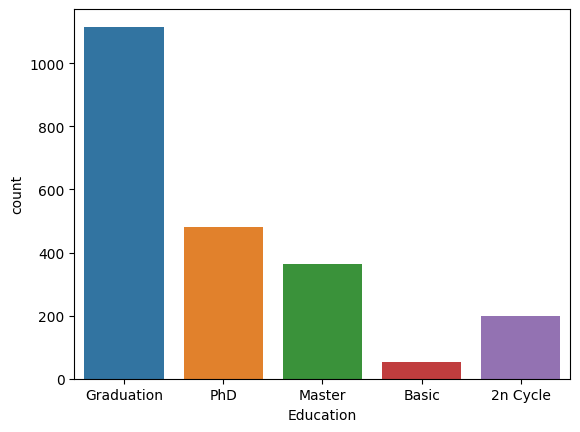

In [36]:
sns.countplot(data=df,x='Education')

In [37]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

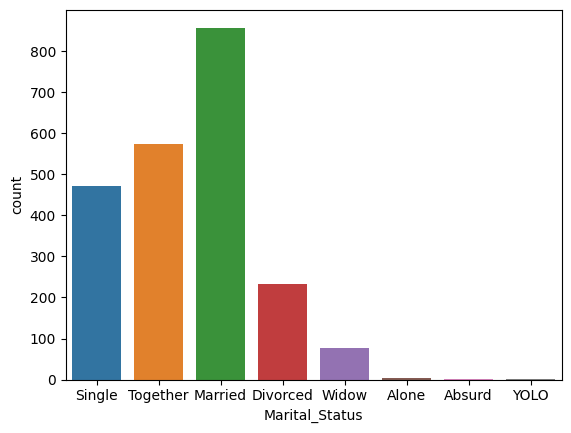

In [38]:
sns.countplot(data=df,x='Marital_Status')

<AxesSubplot:xlabel='Education', ylabel='MntWines'>

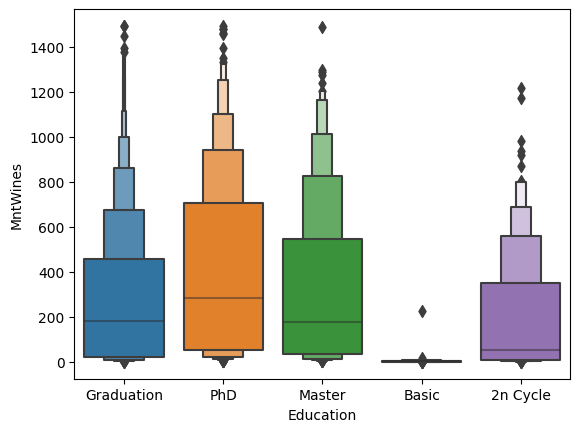

In [39]:
sns.boxenplot(data=df,x='Education',y ='MntWines')

<AxesSubplot:xlabel='Marital_Status', ylabel='MntMeatProducts'>

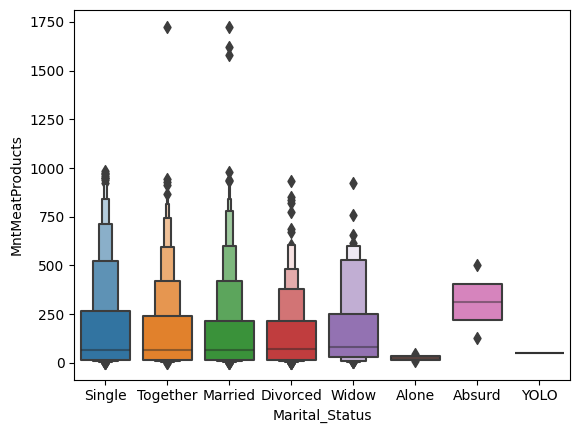

In [40]:
sns.boxenplot(data=df,x='Marital_Status',y ='MntMeatProducts')

<AxesSubplot:xlabel='Marital_Status', ylabel='MntWines'>

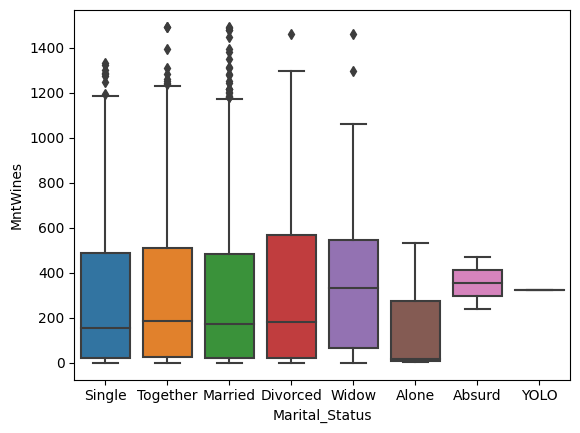

In [41]:
sns.boxplot(data=df,x='Marital_Status',y ='MntWines')

<AxesSubplot:xlabel='Marital_Status', ylabel='MntFishProducts'>

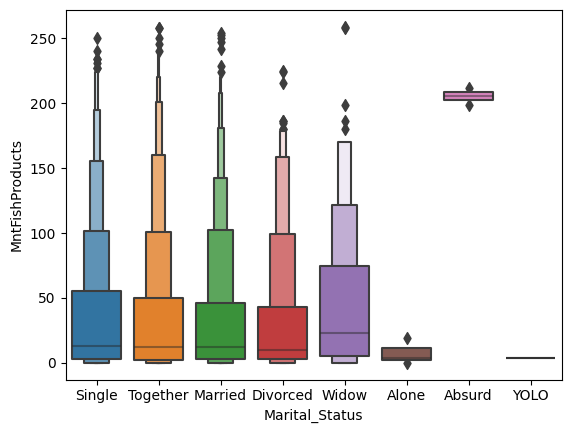

In [42]:
sns.boxenplot(data=df,x='Marital_Status',y ='MntFishProducts')

<AxesSubplot:xlabel='Kidhome', ylabel='MntFruits'>

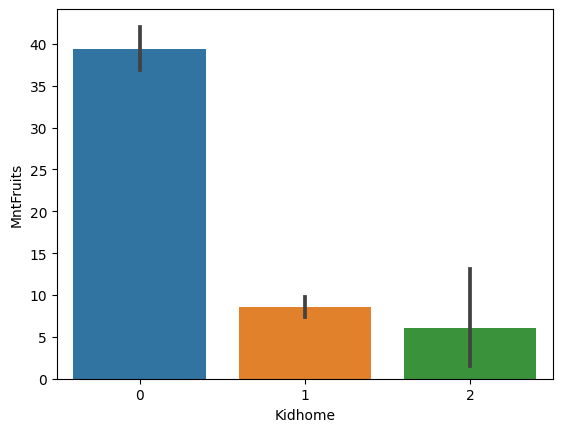

In [43]:
sns.barplot(data=df,x='Kidhome',y ='MntFruits')

<AxesSubplot:xlabel='Marital_Status', ylabel='NumWebVisitsMonth'>

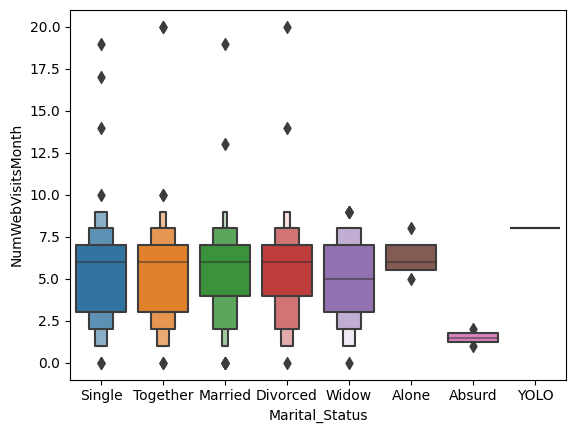

In [44]:
sns.boxenplot(data=df,x='Marital_Status',y ='NumWebVisitsMonth')

<AxesSubplot:xlabel='Complain', ylabel='Marital_Status'>

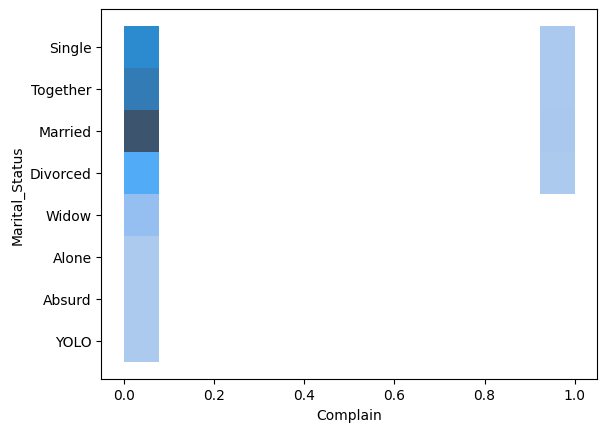

In [45]:
sns.histplot(data=df,y='Marital_Status',x ='Complain')

<AxesSubplot:xlabel='Marital_Status', ylabel='Response'>

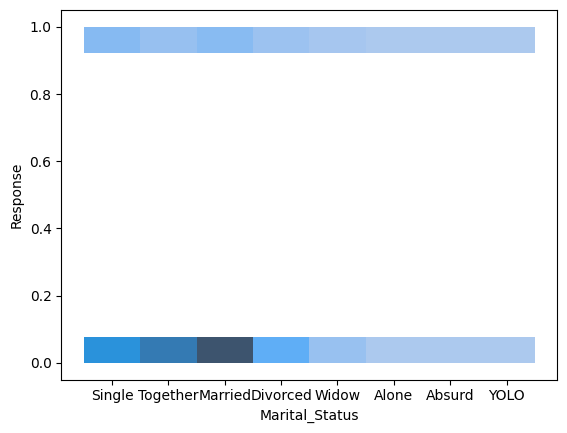

In [46]:
sns.histplot(data=df,x='Marital_Status',y ='Response')

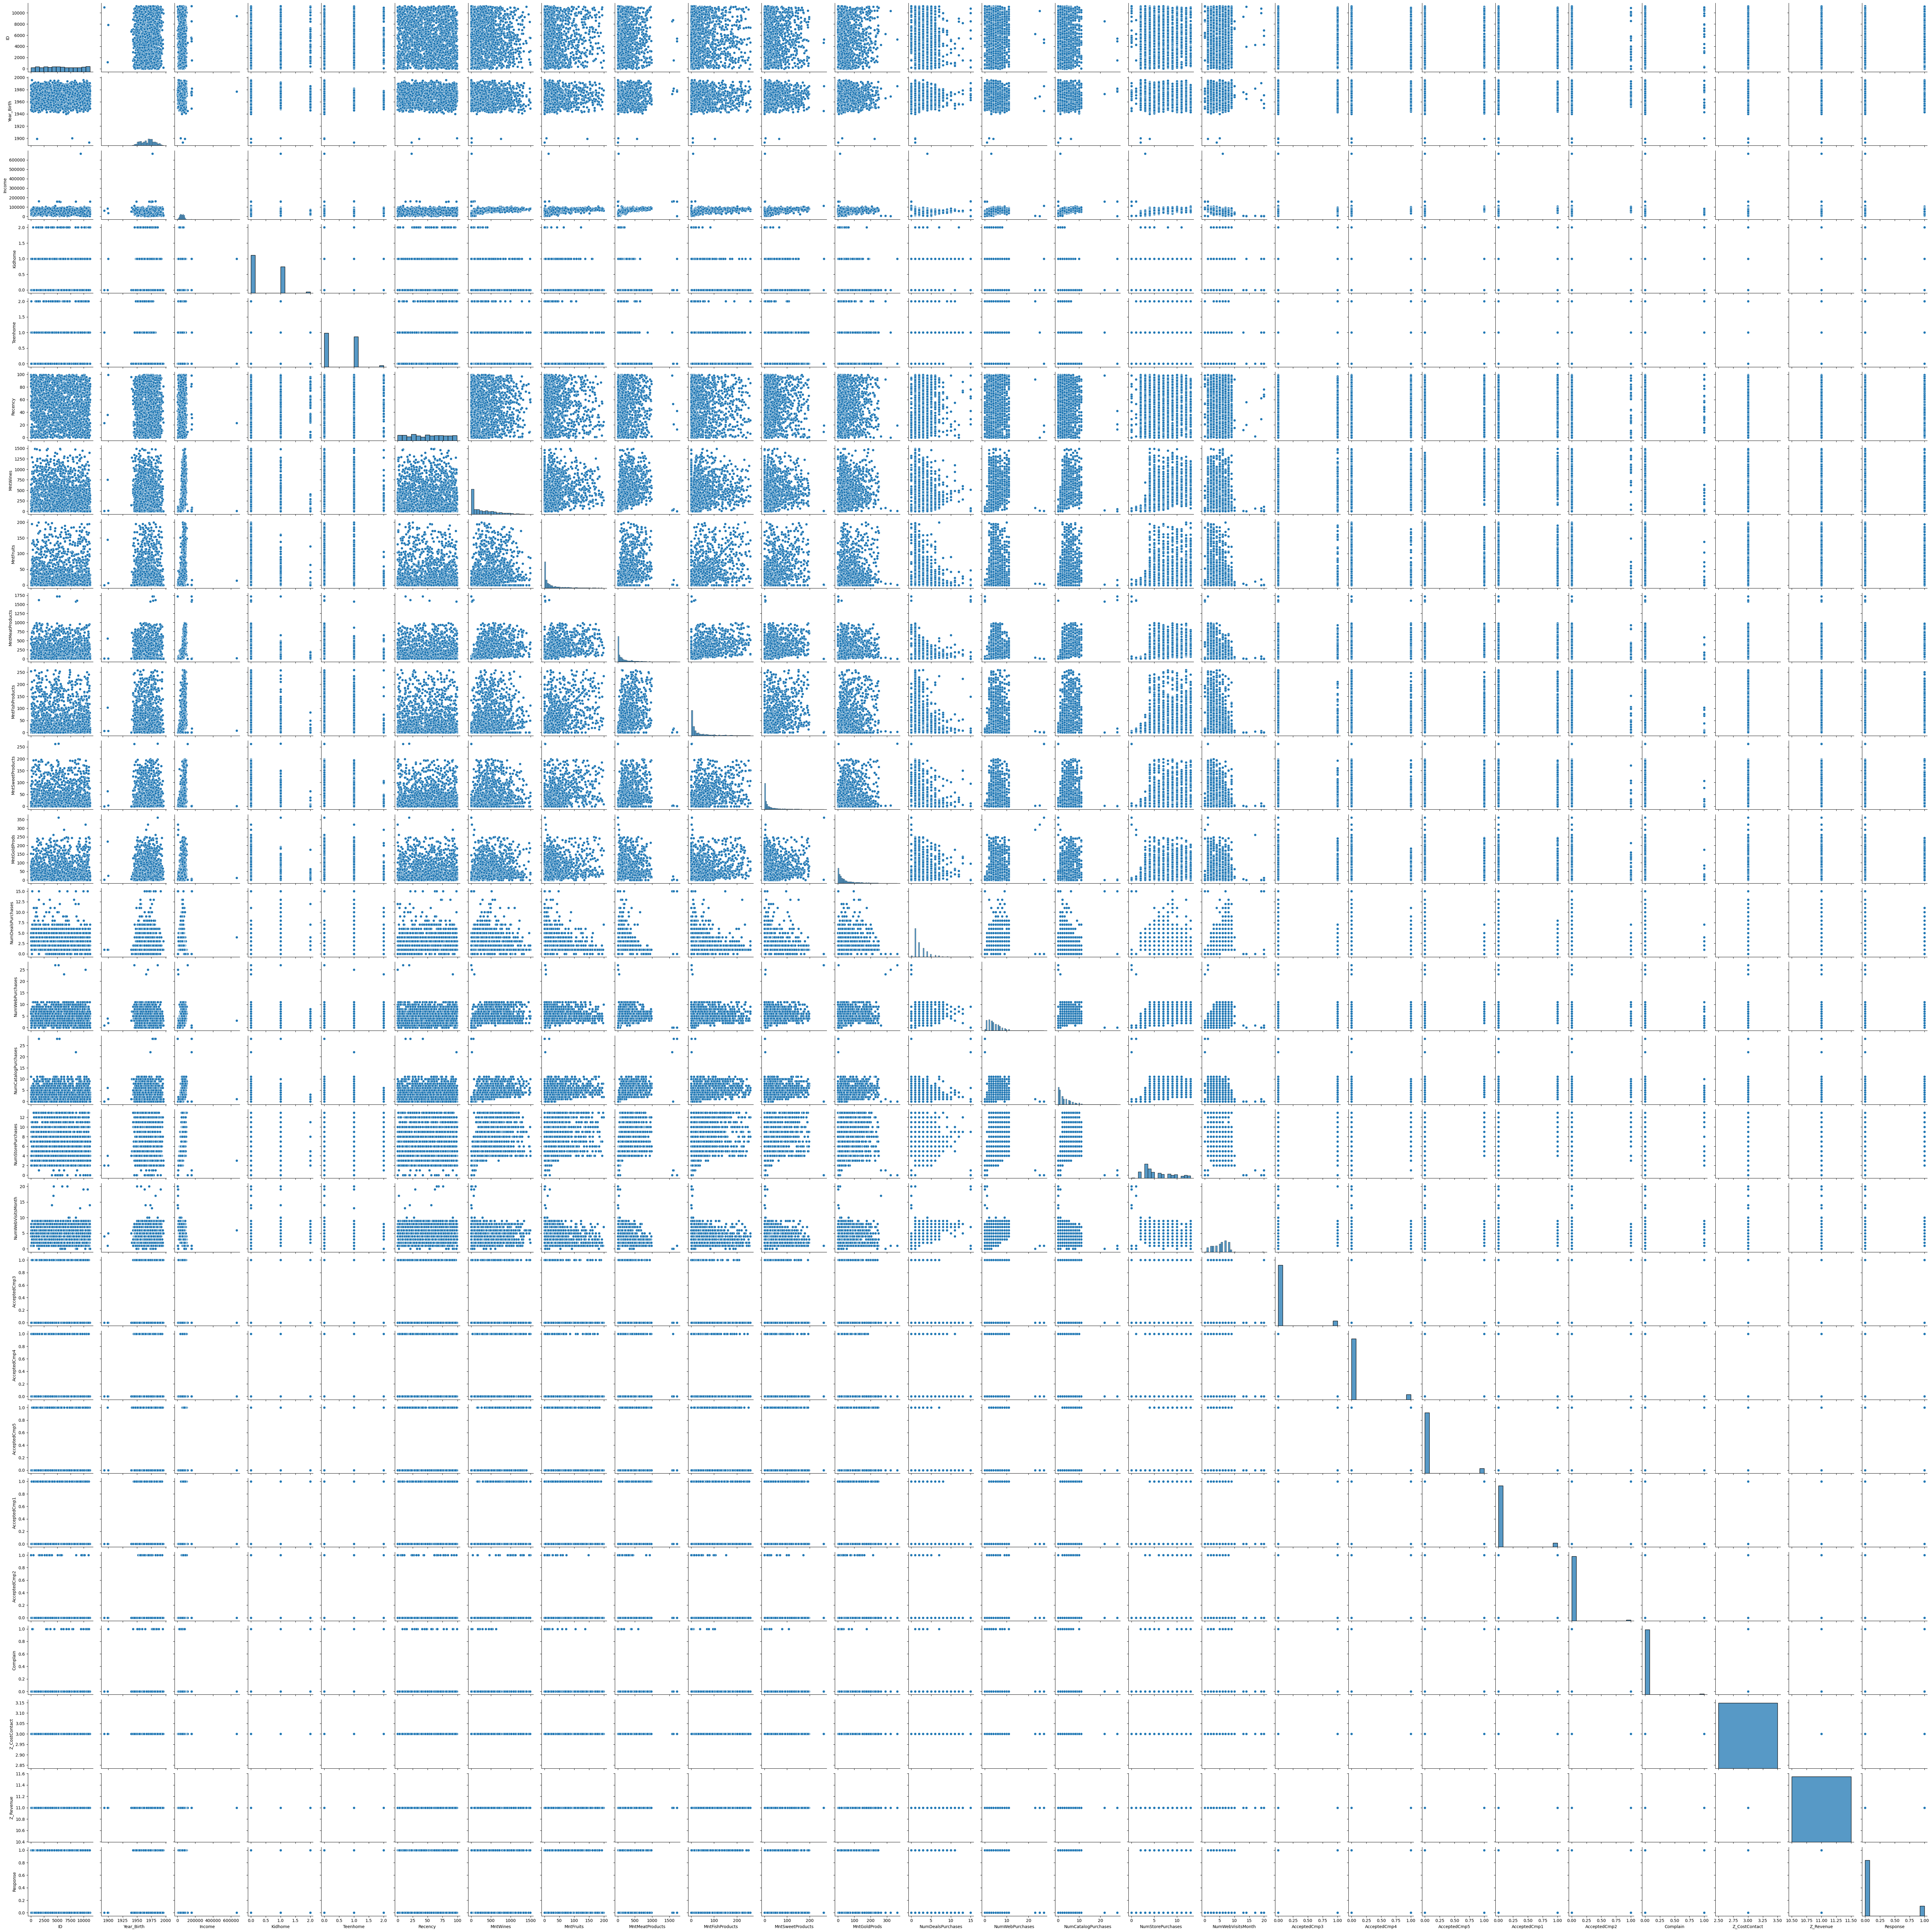

In [4]:
sns.pairplot(data=df)